In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


data_set = pd.read_csv('../data/WineQT.csv')
data_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [165]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [166]:
data_set.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [167]:
data_set['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

INDEPENDENT & DEPENDENT VARIABLE

In [168]:
x = data_set.iloc[:, :-2].values
y = data_set.iloc[:, -2].values.ravel()

TRAIN TEST SPLIT

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ,random_state=0)

In [170]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train, y_train)

In [171]:
# testing model

y_predict = decision_tree.predict(x_test)

print(y_predict)

[6 6 5 6 5 6 6 6 6 6 5 5 5 5 6 6 6 5 5 4 7 5 5 6 5 5 5 6 4 5 5 5 6 7 6 6 6
 5 5 6 5 6 5 6 5 5 5 7 7 6 5 5 5 6 5 5 5 5 5 4 5 4 5 5 5 5 6 5 5 7 5 5 6 7
 6 7 7 6 6 7 4 6 6 6 6 6 6 5 5 5 6 6 5 5 5 5 5 5 5 6 4 6 8 5 5 6 6 7 5 5 5
 5 5 7 5 5 4 6 6 6 6 5 5 6 6 5 6 7 5 5 6 6 5 6 5 6 5 7 6 5 7 4 6 7 5 6 8 6
 7 5 5 6 5 6 5 6 6 7 6 6 5 7 5 5 5 6 6 7 5 5 5 5 4 5 6 6 6 6 5 6 5 5 6 5 6
 5 6 5 6 6 6 5 7 6 7 5 6 5 6 5 6 7 6 6 7 6 6 5 4 5 6 6 6 6 5 5 6 7 5 6 6 6
 6 6 5 6 6 6 5]


Akurasi Test 0.5676855895196506
akurasi : 0.5676855895196506
F1 Score (Inti) : 0.569282877407235
Precision : 0.571268055449975


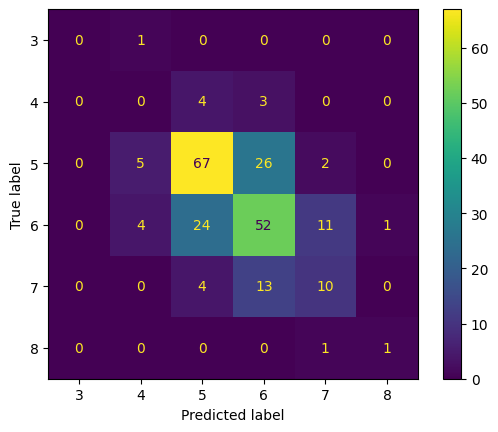

In [172]:
print("Akurasi Test", accuracy_score(y_test, y_predict))
report_data = classification_report(y_test, y_predict, zero_division=0, output_dict=True)
accuracy = report_data['accuracy']
f1_weighted = report_data['weighted avg']['f1-score']
precision = report_data['weighted avg']['precision']
print(f"akurasi : {accuracy}")
print(f"F1 Score (Inti) : {f1_weighted}")
print(f"Precision : {precision}")
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

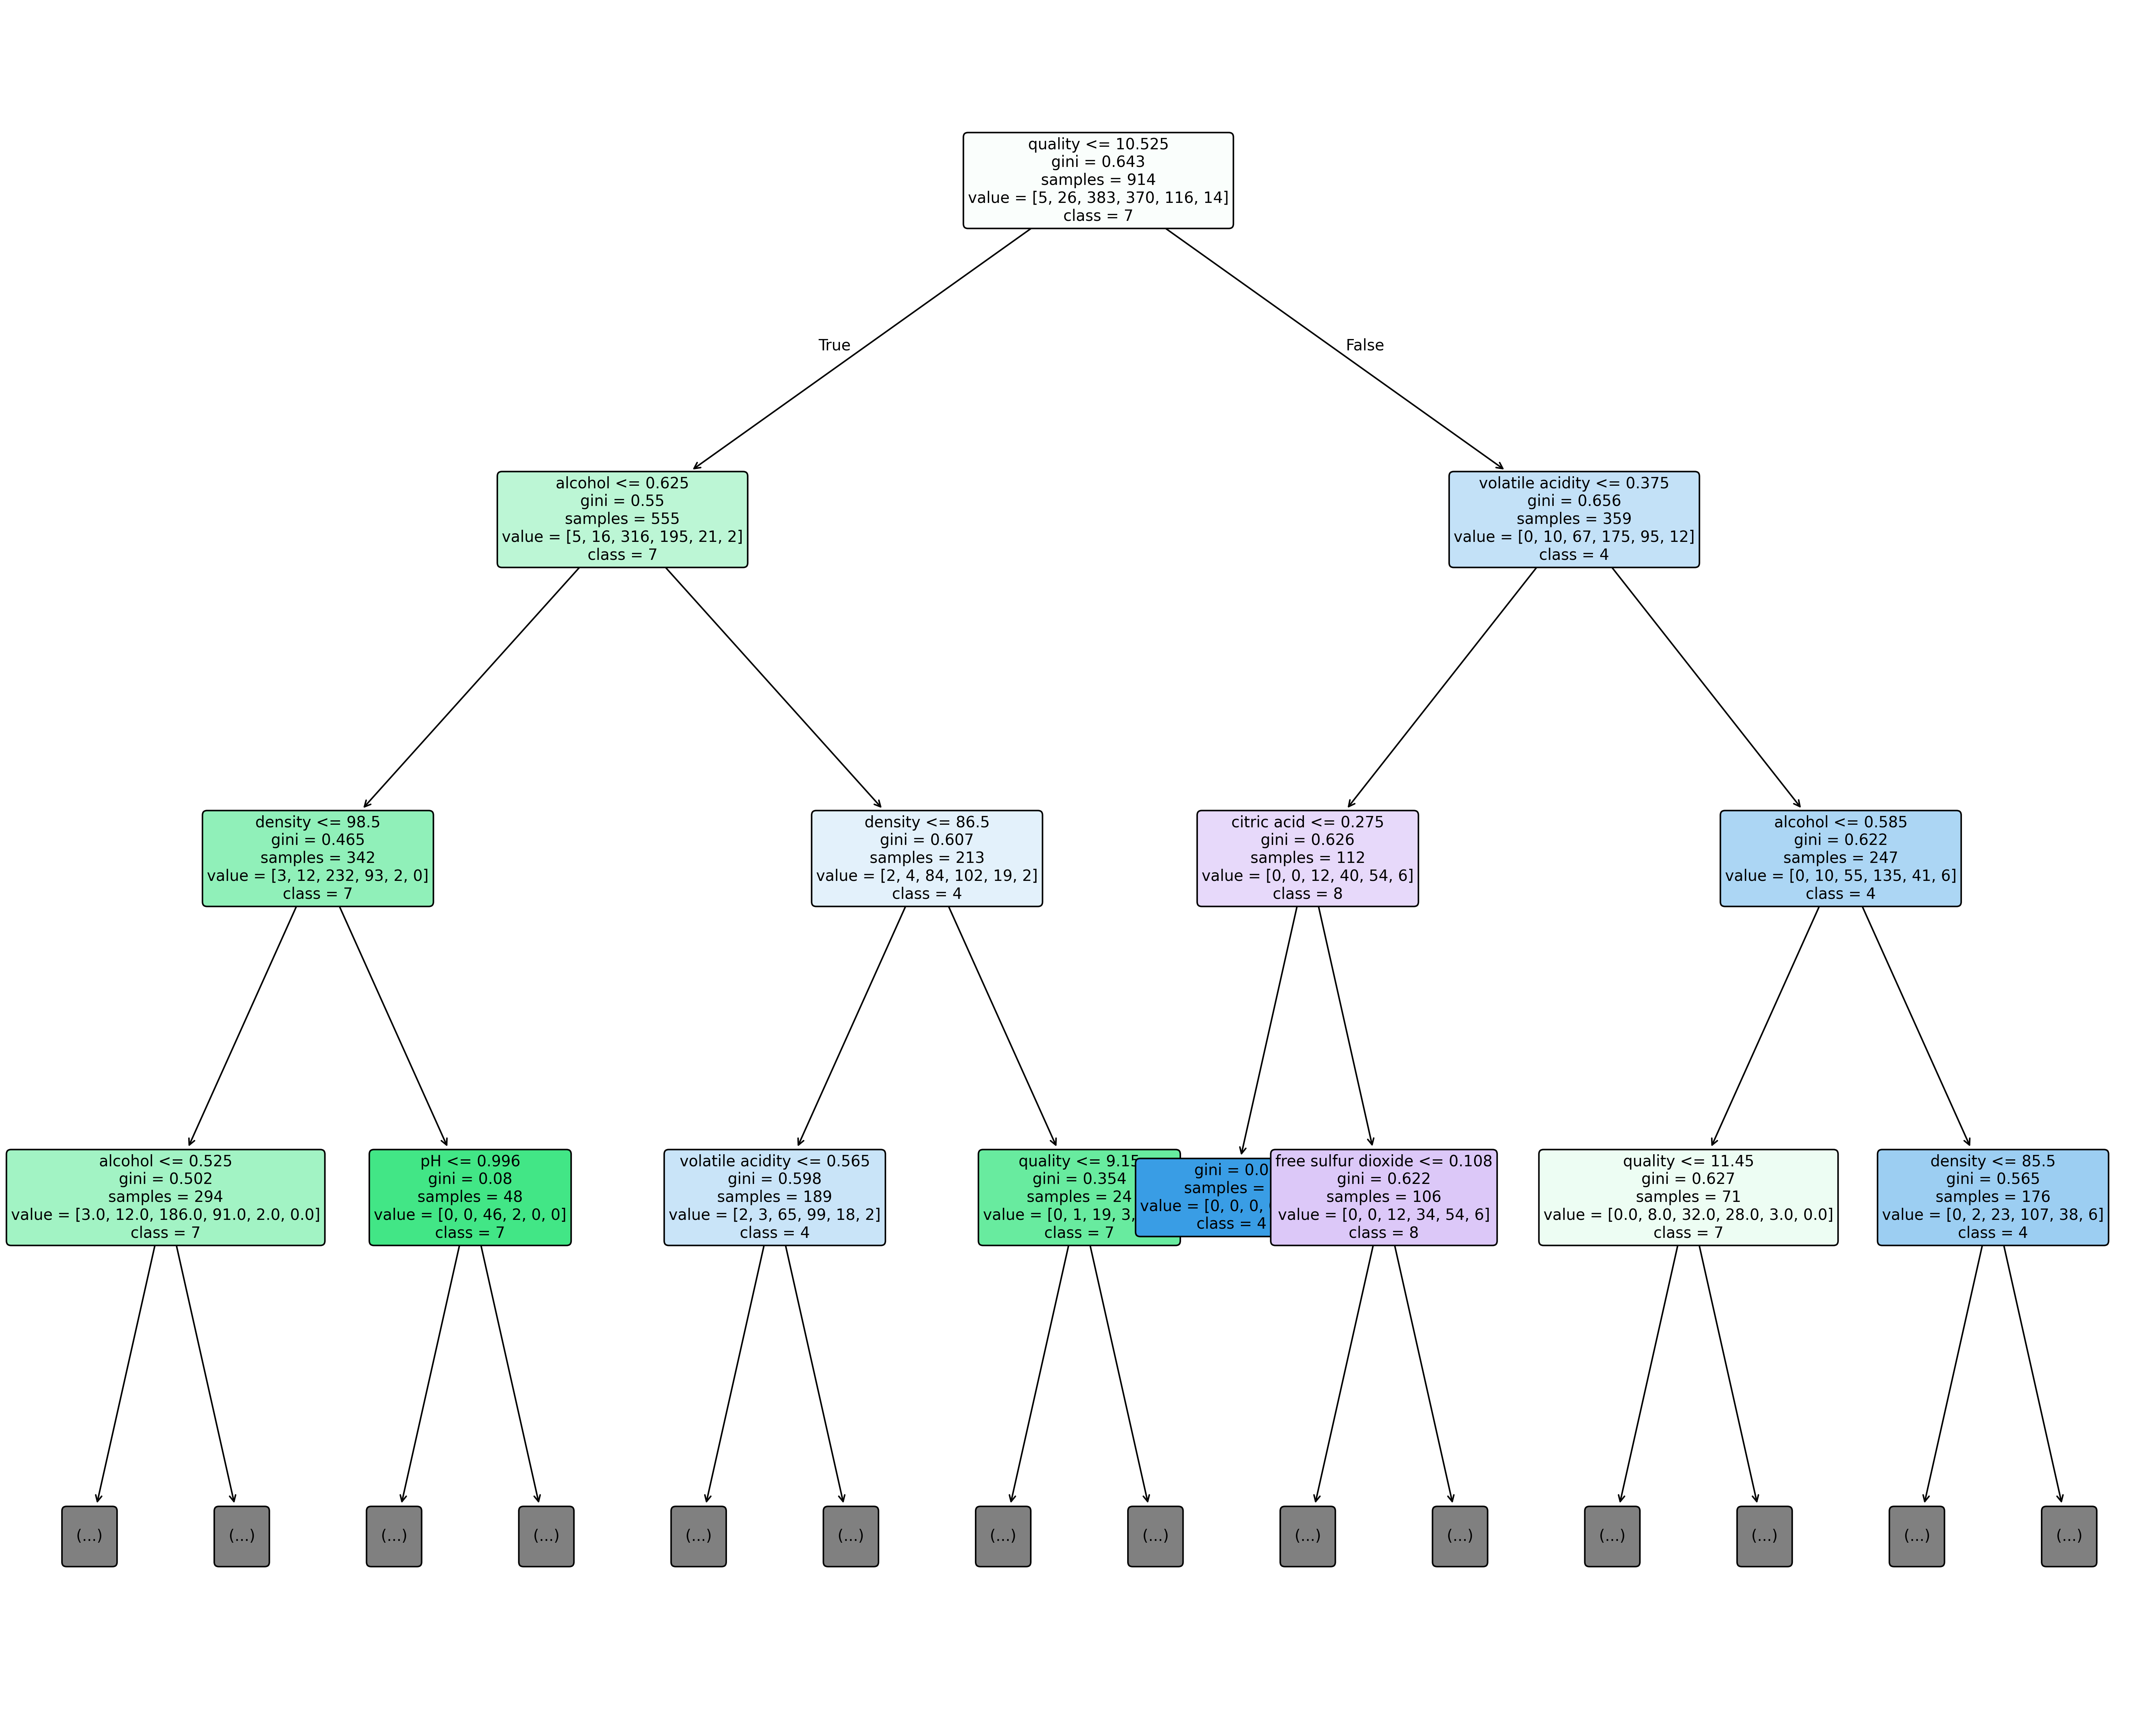

In [173]:
# visualisasi decision tree
fn = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar	chlorides',	'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates', 'alcohol','quality']
cn = ['5', '6', '7', '4', '8', '3']
fig = plt.figure(figsize=(25, 20), dpi=300)
pict_tree = tree.plot_tree(decision_tree, feature_names=fn, class_names=cn, filled=True, fontsize=10, rounded=True, max_depth=3)
plt.show()

In [174]:
# save gambar
fig.savefig('../reports/decision_tree.pdf', format='pdf')


In [175]:
# TEST DECISION TREE New Data
# fn = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar	chlorides',	'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates', 'alcohol','quality']
 
input_data = [
    # data 1
    [7.4, 0.35, 0.40, 2.4, 0.070, 15.0, 35.0, 0.9960, 3.20, 0.70, 11.5],
    
    # data 2
    [0, 10, 67, 175, 95, 12, 80.0, 0.9980, 3.15, 0.55, 7.4]
]
predict_new_data = decision_tree.predict(input_data)
print("prediksi data baru, quality ",  predict_new_data[0] ,'&',predict_new_data[1])



prediksi data baru, quality  6 & 5
